In [6]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))


import pandas as pd
import hydra.model.helper as helper

from tqdm import tqdm
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
FILENAME = "2020-08-14-22-39-05-658838"
METAPATH = "./results/data/meta.txt"

In [3]:
# Read the simulation results
calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 60, 60)
calcium.shape

(17500, 60, 60)

In [19]:
# Separate ectoderm and endoderm
calcium_ecto = calcium[5000:, :30, :]
calcium_endo = calcium[5000:, 30:, :]

In [22]:
len(calcium_ecto) / 5

2500.0













  0%|                                                                                         | 0/2500 [00:00<?, ?it/s]











  0%|                                                                                 | 3/2500 [00:00<01:55, 21.64it/s]











  0%|▏                                                                                | 5/2500 [00:00<02:01, 20.55it/s]











  0%|▏                                                                                | 7/2500 [00:00<02:05, 19.82it/s]











  0%|▎                                                                                | 9/2500 [00:00<02:10, 19.15it/s]











  0%|▎                                                                               | 11/2500 [00:00<02:13, 18.65it/s]











  1%|▍                                                                               | 13/2500 [00:00<02:16, 18.22it/s]











  1%|▍                                                                 

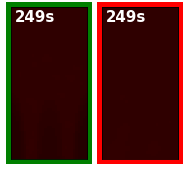

In [39]:
numx = 30
numy = 60
dpi = 100
fps = 200
savepath = './results/video/calcium/'

fig = plt.figure(figsize=(300/dpi, 300/dpi))

for iframe in tqdm(range(0, len(calcium_ecto), 5)):

    plt.clf()

    frame_ecto = calcium_ecto[iframe]
    frame_endo = calcium_endo[iframe]
    frame_ecto = np.flip(frame_ecto.T, 0)
    frame_endo = np.flip(frame_endo.T, 0)
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(frame_ecto, cmap='hot', vmin=0, vmax=1)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.patch.set_edgecolor('g')  
    ax1.patch.set_alpha(1)
    ax1.patch.set_linewidth('10')  
    ax1.text(0.05, 0.9, str(int(iframe*0.02)) + 's', size=15, weight="bold", color='white', transform=ax1.transAxes)
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(frame_endo, cmap='hot', vmin=0, vmax=1)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.patch.set_edgecolor('r')  
    ax2.patch.set_alpha(1)
    ax2.patch.set_linewidth('10') 
    ax2.text(0.05, 0.9, str(int(iframe*0.02)) + 's', size=15, weight="bold", color='white', transform=ax2.transAxes)

    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

#     plt.xlim(0, numx)
#     plt.ylim(0, numy)
#     plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    plt.margins(0, 0)

    plt.savefig(savepath + 'frames/img' + str(iframe) + '.jpg', dpi=dpi)


In [40]:
# Save video
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
videoWriter = cv2.VideoWriter(savepath + '/video.avi', fourcc, fps, (300, 300))

for iframe in tqdm(range(len(calcium_ecto))):
    frame = cv2.imread(savepath + 'frames/img' + str(iframe) + '.jpg')
    videoWriter.write(frame)
videoWriter.release()
cv2.destroyAllWindows()













  0%|                                                                                        | 0/12500 [00:00<?, ?it/s]











  1%|▋                                                                           | 111/12500 [00:00<00:11, 1090.49it/s]











  2%|█▎                                                                          | 226/12500 [00:00<00:11, 1102.07it/s]











  3%|██                                                                          | 346/12500 [00:00<00:10, 1125.63it/s]











  4%|██▊                                                                         | 466/12500 [00:00<00:10, 1144.40it/s]











  5%|███▌                                                                        | 581/12500 [00:00<00:10, 1136.57it/s]











  6%|████▎                                                                       | 701/12500 [00:00<00:10, 1145.87it/s]











  7%|████▉                                                             